In [529]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [530]:
# Setup
plt.style.use('ggplot')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000)

In [531]:
# Load the dataset
df = pd.read_csv("heart_disease_project_data/heart_disease_data.csv")

In [532]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.327367,6.369381,12.02,24.03,27.34,31.44,119.0
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.0
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.0
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.0


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

In [534]:
df.reset_index(drop = True, inplace = True)

In [535]:
# Missing values
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values

Index(['AlcoholDrinking', 'Stroke', 'SkinCancer',
       'HeartDisease_FamilyHistory'],
      dtype='object')

In [536]:
df.dropna(inplace=True)

In [537]:
binary_columns = df.columns[(df.nunique() == 2)]
binary_columns


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'HeartDisease_FamilyHistory'],
      dtype='object')

In [538]:
df[binary_columns] = df[binary_columns].replace({"No": 0, "Yes": 1})

In [539]:
df.describe(include=['object']).T

,count,unique,top,freq
Sex,23436,2,Female,12204
AgeCategory,23436,14,65-69,2518
Race,23436,6,White,17948
Diabetic,23436,4,No,19801
GenHealth,23436,5,Very good,8461
State,23436,51,WA,493


In [540]:
object_columns = df.select_dtypes(include=['object']).columns
# df[object_columns]


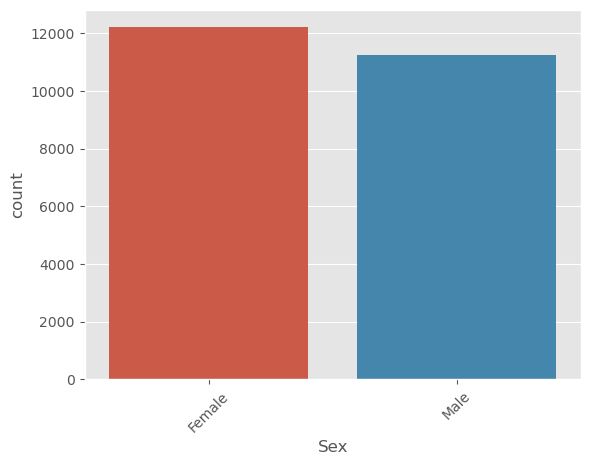

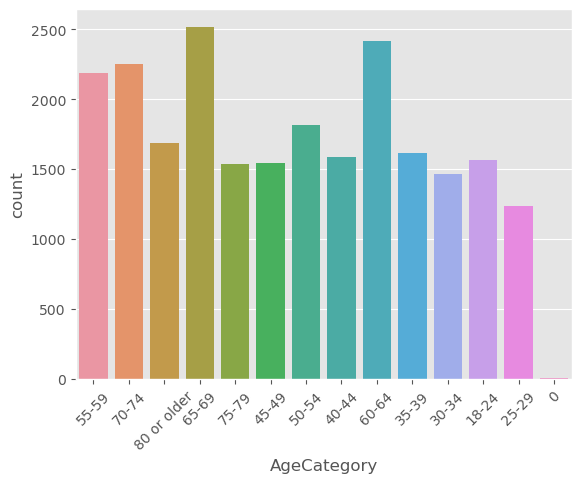

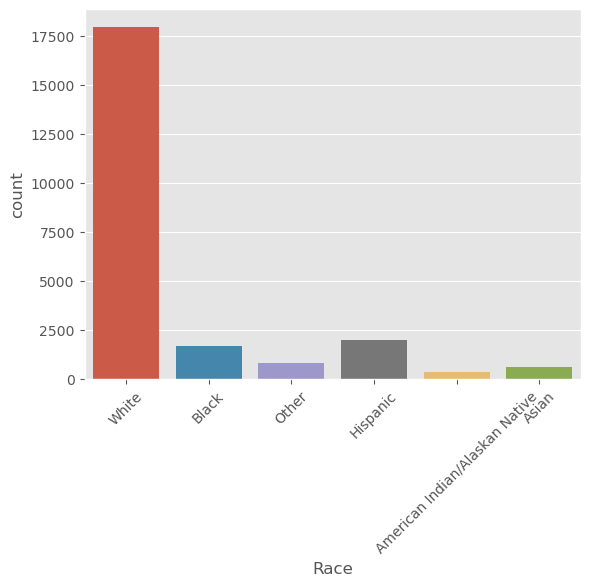

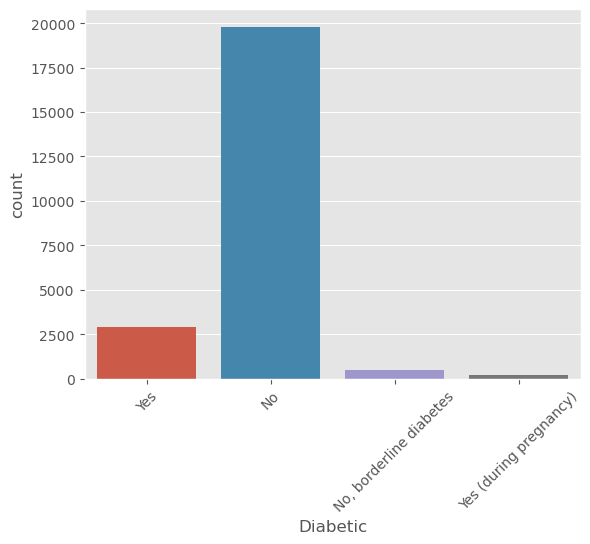

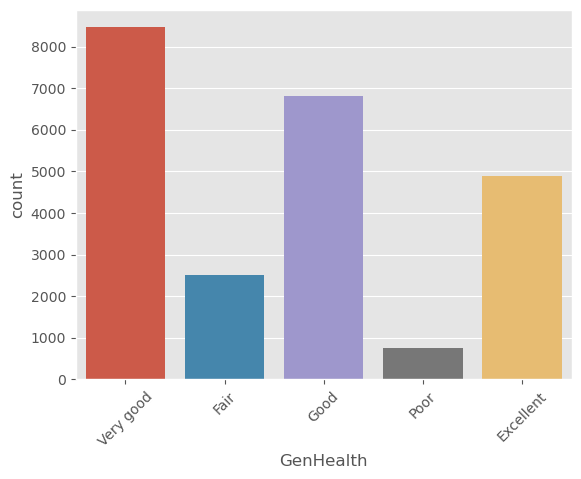

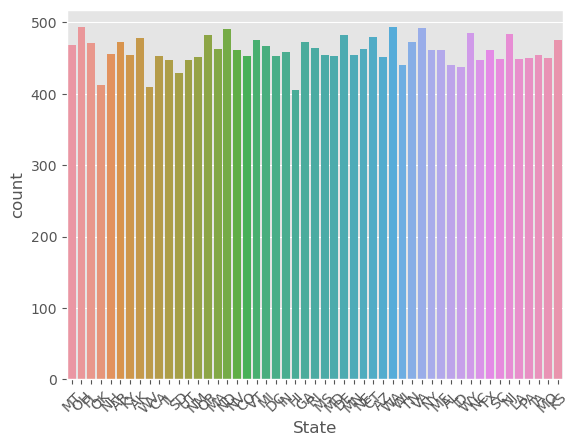

In [541]:
for column in object_columns:
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.show()


In [542]:
df['Diabetic'].value_counts()

Diabetic
No                         19801
Yes                         2918
No, borderline diabetes      499
Yes (during pregnancy)       218
Name: count, dtype: int64

In [543]:
df = df[~df['Diabetic'].isin(['No, borderline diabetes', 'Yes (during pregnancy)'])]
df['Diabetic'].value_counts()


Diabetic
No     19801
Yes     2918
Name: count, dtype: int64

In [544]:
df.loc[:, 'Diabetic'] = df['Diabetic'].replace({"No": 0, "Yes": 1})

In [545]:
df.apply(lambda x: x.nunique(), axis=0)

HeartDisease                     2
BMI                           1893
Smoking                          2
AlcoholDrinking                  2
Stroke                           2
PhysicalHealth                  31
MentalHealth                    31
DiffWalking                      2
Sex                              2
AgeCategory                     14
Race                             6
Diabetic                         2
PhysicalActivity                 2
GenHealth                        5
SleepTime                       20
Asthma                           2
KidneyDisease                    2
SkinCancer                       2
HeartDisease_FamilyHistory       2
State                           51
dtype: int64

In [546]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Sex,22719,2,Female,11713
AgeCategory,22719,14,65-69,2429
Race,22719,6,White,17456
Diabetic,22719,2,0,19801
GenHealth,22719,5,Very good,8240
State,22719,51,OH,485


In [547]:
df.drop('State', axis=1, inplace=True)

In [548]:
def OHE(dataframe, column_name):
    dummy_dataset = pd.get_dummies(dataframe[column_name], prefix = column_name)
    dataframe = pd.concat([dataframe, dummy_dataset], axis = 1)
    dataframe.drop(column_name, axis = 1, inplace = True)
    del dummy_dataset
    
    return dataframe

df = OHE(df, 'Sex')
df = OHE(df, 'AgeCategory')
df = OHE(df, 'Race')
df = OHE(df, 'Diabetic')
df = OHE(df, 'GenHealth')
# df = OHE(df, 'State')

In [549]:
correlation = df.corr()['HeartDisease']
correlation = correlation.drop('HeartDisease')
correlation = correlation.sort_values(ascending=False)
print(correlation)

Stroke                                 0.199103
DiffWalking                            0.197420
Diabetic_1                             0.188296
GenHealth_Poor                         0.182246
PhysicalHealth                         0.164482
GenHealth_Fair                         0.161958
KidneyDisease                          0.150700
AgeCategory_80 or older                0.134853
Smoking                                0.116061
AgeCategory_75-79                      0.089060
AgeCategory_70-74                      0.084149
SkinCancer                             0.078048
Sex_Male                               0.072430
BMI                                    0.070090
AgeCategory_65-69                      0.048102
Asthma                                 0.041160
Race_White                             0.037434
GenHealth_Good                         0.024569
AgeCategory_60-64                      0.023799
MentalHealth                           0.023673
HeartDisease_FamilyHistory             0

In [550]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,Sex_Female,Sex_Male,AgeCategory_0,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_0,Diabetic_1,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,0,1,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True
39,0,21.93,0,0,0,3.0,2.0,0,1,4.0,0,1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
48,0,20.12,0,0,0,0.0,0.0,1,0,7.0,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False
96,0,24.02,0,0,0,0.0,14.0,0,1,7.0,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True
101,1,24.68,1,0,0,30.0,30.0,1,1,8.0,0,0,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False


In [551]:
# Split the dataset into features and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [552]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Important, regulate over-adjustment
                        # min_samples_split=2, # minimum number of observations in each split
                        # min_samples_leaf=1, # minimum number of observations in each leaf 
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [553]:
### Train model
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

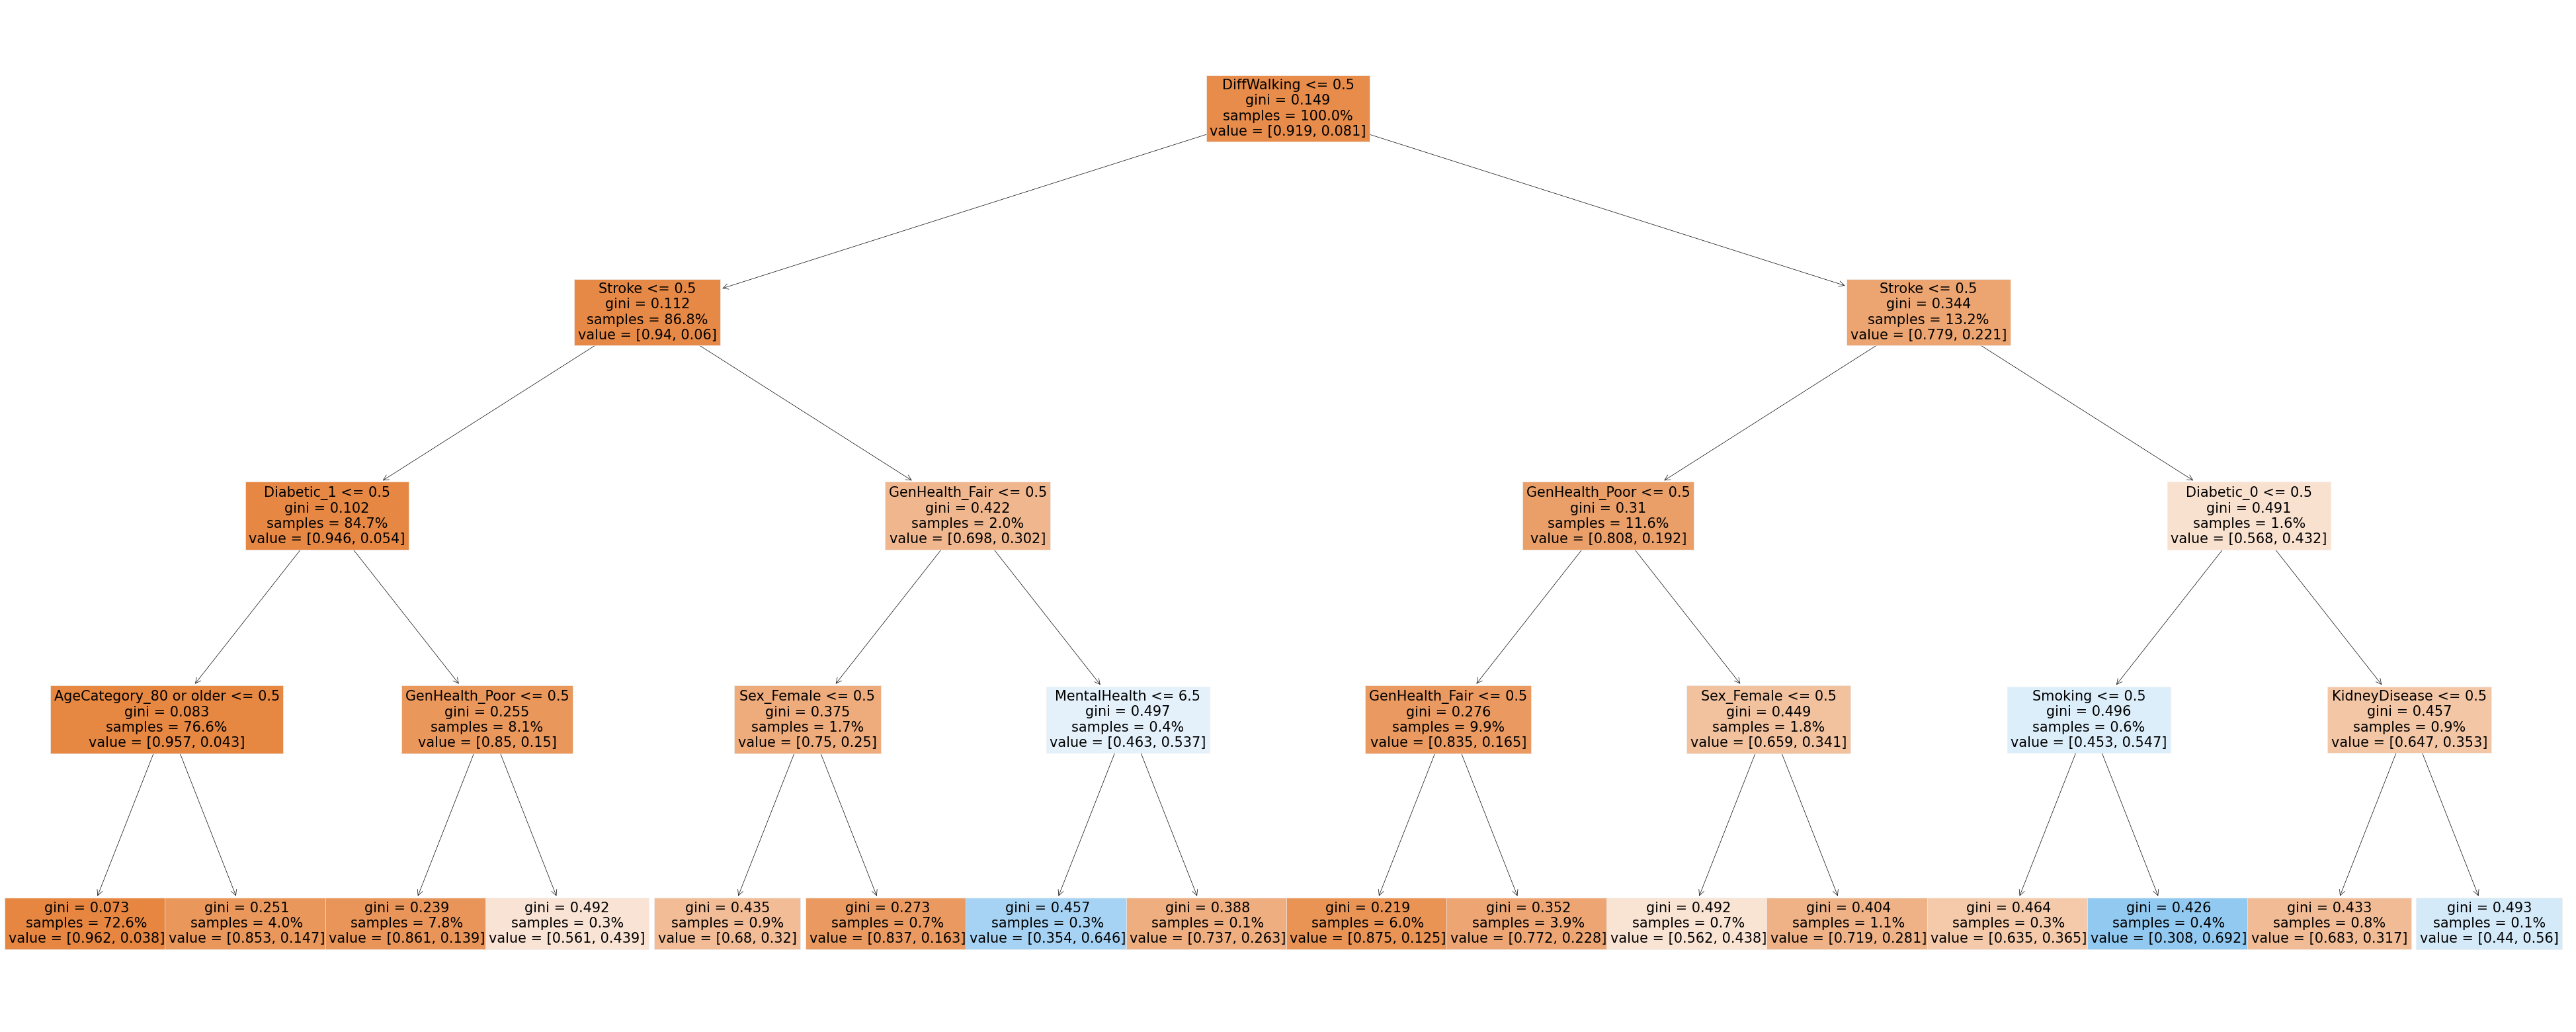

In [554]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt, 
               ax=ax, 
               fontsize=15,
               proportion=True,
               filled=True, 
               feature_names=list(X_test.columns));


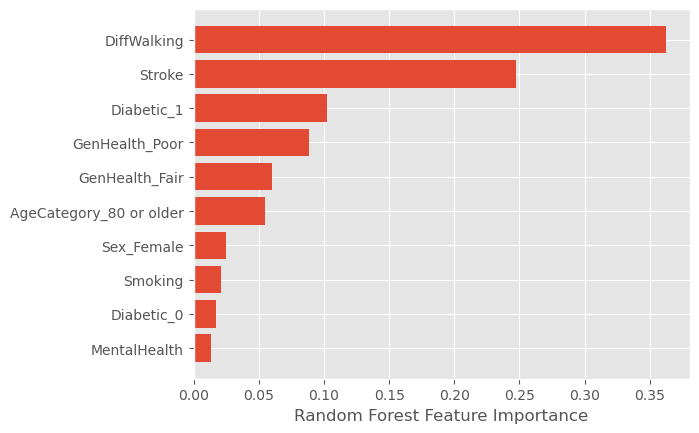

In [555]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

#### Evaluation over train dataset

In [556]:
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['DelayPrediction'])

In [557]:
results_df = pd.merge(y_train, y_train_pred, left_index=True, right_index=True, how='inner')


In [558]:
results_df['Success'] = (results_df['HeartDisease'] == results_df['DelayPrediction']).astype(int)


In [559]:
results_df.head(20)

,HeartDisease,DelayPrediction,Success
318319,0,0,1
68542,0,0,1
120304,0,0,1
5720,0,0,1
161176,0,0,1
252142,0,0,1
100750,0,0,1
19682,0,0,1
148739,1,0,0
154249,0,0,1


In [560]:
results_df['Success'].count()

18175

In [561]:
results_df['Success'].sum()

16748

In [562]:
results_df['Success'].mean()

0.9214855570839064

In [563]:
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 16748 from a total of 18175. The accuracy is 0.9214855570839064.


In [564]:
confusion_matrix = pd.crosstab(results_df['HeartDisease'], results_df['DelayPrediction'])
confusion_matrix

DelayPrediction,0,1
HeartDisease,,
0,16658,48
1,1379,90


In [565]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [566]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9214855570839064

In [567]:
Precision = TP / (TP+FP)
Recall = TP/(TP+FN)
print(Precision)
print(Recall)

0.6521739130434783
0.06126616746085772


In [568]:
confusion_matrix_m = metrics.confusion_matrix(results_df['HeartDisease'],results_df['DelayPrediction'])
Accuracy_m = metrics.accuracy_score(results_df['HeartDisease'], results_df['DelayPrediction'])
Precision_m = metrics.precision_score(results_df['HeartDisease'],results_df['DelayPrediction'])
Recall_m = metrics.recall_score(results_df['HeartDisease'],results_df['DelayPrediction'])

print("Confusion matrix: ", confusion_matrix_m)
print("Accuracy: ", Accuracy_m)
print("Precision: ", Precision_m)
print("Recall: ", Recall_m)

Confusion matrix:  [[16658    48]
 [ 1379    90]]
Accuracy:  0.9214855570839064
Precision:  0.6521739130434783
Recall:  0.06126616746085772


In [569]:
dt.score(X_test, y_test)

0.9139524647887324

#### Evaluation over test dataset

In [570]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['DelayPrediction'])

In [571]:
results_df_test = pd.merge(y_test, y_test_pred, left_index=True, right_index=True, how='inner')
results_df_test['Success'] = (results_df_test['HeartDisease'] == results_df_test['DelayPrediction']).astype(int)

In [572]:
confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['HeartDisease'], results_df_test['DelayPrediction'])
Precision_m_test = metrics.precision_score(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])
Recall_m_test = metrics.recall_score(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)

Confusion matrix:  [[4128   13]
 [ 378   25]]
Accuracy:  0.9139524647887324
Precision:  0.6578947368421053
Recall:  0.062034739454094295


In [573]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [574]:
results_df_test = results_df_test.join(y_score)

In [575]:
results_df_test.head(10)

,HeartDisease,DelayPrediction,Success,DelayScore
300722,0,0,1,0.037792
259217,0,0,1,0.037792
48207,0,0,1,0.037792
311044,0,0,1,0.037792
210766,0,0,1,0.037792
134220,0,0,1,0.037792
265719,0,0,1,0.037792
84194,0,0,1,0.125343
104172,0,0,1,0.037792
197722,0,0,1,0.037792


In [576]:
results_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4544 entries, 300722 to 313904
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HeartDisease     4544 non-null   int64  
 1   DelayPrediction  4544 non-null   int64  
 2   Success          4544 non-null   int64  
 3   DelayScore       4544 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 306.5 KB


In [577]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree max_depth: 1. Train: 0.9191746905089409 - Test: 0.9113116197183099
Tree max_depth: 2. Train: 0.9191746905089409 - Test: 0.9113116197183099
Tree max_depth: 3. Train: 0.9200550206327373 - Test: 0.9139524647887324
Tree max_depth: 4. Train: 0.9214855570839064 - Test: 0.9139524647887324
Tree max_depth: 5. Train: 0.9228610729023384 - Test: 0.9130721830985915
Tree max_depth: 6. Train: 0.9245667125171939 - Test: 0.9124119718309859
Tree max_depth: 7. Train: 0.9269876203576342 - Test: 0.9077904929577465
Tree max_depth: 8. Train: 0.9311141678129299 - Test: 0.9110915492957746
Tree max_depth: 9. Train: 0.9362310866574965 - Test: 0.909330985915493
Tree max_depth: 10. Train: 0.9407977991746905 - Test: 0.910431338028169
Tree max_depth: 11. Train: 0.9456946354883081 - Test: 0.9036091549295775
Tree max_depth: 12. Train: 0.9524621733149932 - Test: 0.8985475352112676
Tree max_depth: 13. Train: 0.9580742778541953 - Test: 0.8974471830985915
Tree max_depth: 14. Train: 0.9647317744154058 - Test: 0.894586

### Model optimization

In [578]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=40)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree Depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree Depth: 1. Train: 0.9191746905089409 - Test: 0.9113116197183099
Tree Depth: 2. Train: 0.9191746905089409 - Test: 0.9113116197183099
Tree Depth: 3. Train: 0.9200550206327373 - Test: 0.9139524647887324
Tree Depth: 4. Train: 0.9214855570839064 - Test: 0.9139524647887324
Tree Depth: 5. Train: 0.9226409903713892 - Test: 0.9128521126760564
Tree Depth: 6. Train: 0.9232462173314994 - Test: 0.9126320422535211
Tree Depth: 7. Train: 0.9242365887207703 - Test: 0.9106514084507042
Tree Depth: 8. Train: 0.9250618982118294 - Test: 0.9108714788732394
Tree Depth: 9. Train: 0.9263273727647868 - Test: 0.9097711267605634
Tree Depth: 10. Train: 0.9266024759284732 - Test: 0.9099911971830986
Tree Depth: 11. Train: 0.9269876203576342 - Test: 0.9095510563380281
Tree Depth: 12. Train: 0.9279229711141678 - Test: 0.9088908450704225
Tree Depth: 13. Train: 0.9281980742778542 - Test: 0.9082306338028169
Tree Depth: 14. Train: 0.9288583218707015 - Test: 0.907350352112676
Tree Depth: 15. Train: 0.9291884456671252 - 

In [579]:
dt = DecisionTreeClassifier(max_depth=11, random_state=42, min_samples_split=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=50, random_state=42)

In [580]:
dt.score(X_train, y_train)

0.9257221458046767

In [581]:
dt.score(X_test, y_test)

0.9097711267605634

In [582]:
results_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4544 entries, 300722 to 313904
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HeartDisease     4544 non-null   int64  
 1   DelayPrediction  4544 non-null   int64  
 2   Success          4544 non-null   int64  
 3   DelayScore       4544 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 306.5 KB


In [583]:
# results_df_test = pd.merge(y_test, y_test_pred, left_index=True, right_index=True, how='inner')
# results_df_test = results_df_test.join(y_test_pred, rsuffix='_pred')

results_df_test = pd.merge(y_test, y_test_pred, on='key_column', how='inner')

results_df_test['Success'] = (results_df_test['HeartDisease'] == results_df_test['DelayPrediction']).astype(int)

results_df_test.info()

KeyError: 'key_column'

In [ ]:
confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['HeartDisease'], results_df_test['DelayPrediction'])
Precision_m_test = metrics.precision_score(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])
Recall_m_test = metrics.recall_score(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])
f1_m_test = metrics.f1_score(results_df_test['HeartDisease'],results_df_test['DelayPrediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)
print("F1 Score: ", f1_m_test)

In [ ]:
print(metrics.roc_auc_score(results_df_test['HeartDisease'], results_df_test['DelayScore']))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(results_df_test['HeartDisease'], results_df_test['DelayScore'])

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
dev_df_X = df.drop(columns=['HeartDisease'])
dev_df_y = df['HeartDisease']
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)
scores

In [ ]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

In [ ]:
scores_list = []
for train_index, test_index in kf.split(df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    dt = DecisionTreeClassifier(max_depth=8, random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

In [ ]:
np.mean(scores_list)

In [ ]:
np.std(scores_list)

In [ ]:
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)

In [ ]:
rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
)

In [ ]:
tree_list = rf.estimators_
tree_list

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[0], 
               ax=ax, 
               fontsize=15,
               proportion=True,
               filled=True, 
               impurity=True,
               rounded=True,
               precision=2,
               class_names=['No Delay', 'Delay'],
               feature_names=list(X_test.columns));

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[1], 
               ax=ax, 
               fontsize=15,
               proportion=True,
               filled=True, 
               impurity=True,
               rounded=True,
               precision=2,
               class_names=['No Delay', 'Delay'],
               feature_names=list(X_test.columns));

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[2], 
               ax=ax, 
               fontsize=15,
               proportion=True,
               filled=True, 
               impurity=True,
               rounded=True,
               precision=2,
               class_names=['No Delay', 'Delay'],
               feature_names=list(X_test.columns));

In [ ]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
top_features

In [ ]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

In [ ]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [ ]:
results_df = pd.DataFrame({'HeartDisease': y_test, 'DelayScore': y_score['DelayScore']})

In [ ]:
results_df.head(10)

In [ ]:
print(metrics.roc_auc_score(results_df['HeartDisease'], results_df['DelayScore']))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(results_df['HeartDisease'], results_df['DelayScore'])


In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=500, random_state=42)
gb.fit(X_train, np.ravel(y_train))

In [ ]:
y_score = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [ ]:
results_df = pd.DataFrame({'HeartDisease': y_test, 'DelayScore': y_score['DelayScore']})

In [ ]:
print(metrics.roc_auc_score(results_df['HeartDisease'], results_df['DelayScore']))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(results_df['HeartDisease'], results_df['DelayScore'])

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 5

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

In [ ]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()